with God's blessing 
and https://www.quantopian.com/posts/the-efficient-frontier-markowitz-portfolio-optimization-in-python

and https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import finance_scripts as fs
from scipy.optimize import minimize
from cvxopt import blas, solvers  
import cvxopt as opt  
import importlib

solvers.options['show_progress'] = False 

In [493]:
# fs.init()
importlib.reload(fs)

<module 'finance_scripts' from '/home/friday/_homescript/finance/lab2/Finance/finance_scripts.py'>

In [335]:
dClosed = pd.read_pickle("close_cleared.pickle") #  цены закрытия
dVolume = pd.read_pickle("volume_cleared.pickle") #  объёмы продаж
print(dClosed.shape[1]) # Число исследуемых компаний

73


In [336]:
portfolio_num = 10
portfolio_stocks = logR.columns[:portfolio_num]
portfolio_R=logR[portfolio_stocks]

### Article usage begins ...

<br>Функция *random_portfolio()* для генерации случайного портфеля, возвращает среднее значение доходности  и стандартное отклонение доходности $\sigma$ портфеля.

Среднее значение расчитывается как взвешенное средних активов, входящий в портфель: 
$\mu=p^\intercal x$, где 
- $x = (x_1, ..., x_n)$ - вектор весов, полученный с помощью функции rand_weights()
- $p$ - вектор средних доходностей активов в портфеле

Стандартное отклонение расчитывается как $\sigma=\sqrt{x^\intercal Cx}$, где
- $C$ - ковариационная матрица доходностей

In [337]:
mu, sigma = fs.random_portfolio(portfolio_R)
print(f'mu = {mu}, sigma = {sigma}')

mu = 0.00041117629175259736, sigma = 0.0064445950989402


In [338]:
n_portfolios = 10000
means, stds = np.column_stack([  
    fs.random_portfolio(portfolio_R) for _ in range(n_portfolios)
])

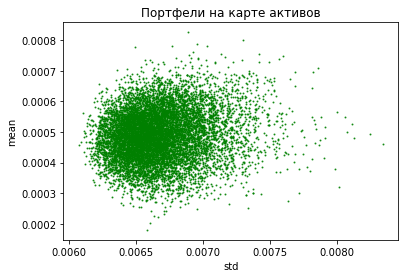

In [339]:
plt.plot(stds, means, 'o', markersize=1, alpha=0.8, color='g')  
plt.xlabel('std')  
plt.ylabel('mean')  
plt.title('Портфели на карте активов')  
plt.show()

## Хотим минимизировать риск портфелей

In [504]:
R_mean = np.mean(portfolio_R, axis=0).values 
C = np.cov(portfolio_R.values.T)
target_R = np.arange(-0.0001,0.0015,0.0001)
efficient_portfolios_sol = fs.efficient_frontier(R_mean, C, target_R, short_terms=False)

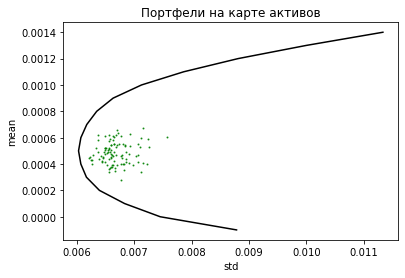

In [505]:
n_portfolios = 100
means, stds = np.column_stack([  
    fs.random_portfolio(portfolio_R) for _ in range(n_portfolios)
])
plt.plot(stds, means, 'o', markersize=1, alpha=0.8, color='g') 

plt.plot(  efficient_portfolios_sol.T[0], efficient_portfolios_sol.T[1], linestyle='-', color='black', label='efficient frontier')
plt.xlabel('std')  
plt.ylabel('mean')  
plt.title('Портфели на карте активов')  
plt.show()

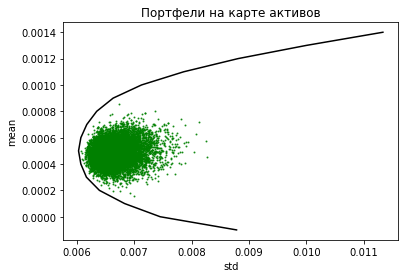

In [506]:
n_portfolios = 10000
means, stds = np.column_stack([  
    fs.random_portfolio(portfolio_R) for _ in range(n_portfolios)
])
plt.plot(stds, means, 'o', markersize=1, alpha=0.8, color='g') 

plt.plot(  efficient_portfolios_sol.T[0], efficient_portfolios_sol.T[1], linestyle='-', color='black', label='efficient frontier')
plt.xlabel('std')  
plt.ylabel('mean')  
plt.title('Портфели на карте активов')  
plt.show()

## Эффективный портфель

$u(\sigma, E) = E-\gamma\sigma \rightarrow max$ - utility function

Из обоснования мы получили, что решение задачи с соответствующим $\gamma$ будет соответствовать точке на эффективном фронте. При этом меня $-\infty < \gamma < \infty$ мы получим все точки эффетивного фронта

In [354]:
gms = [0, 0.001, 0.1, 0.5, 1]
opts = fs.optimal_portfolios(R_mean, C, gms)

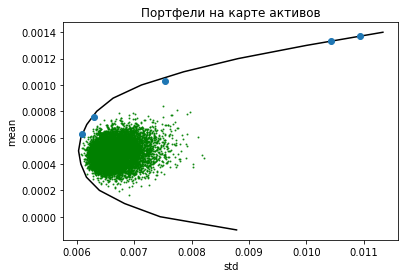

In [507]:
n_portfolios = 10000
means, stds = np.column_stack([  
    fs.random_portfolio(portfolio_R) for _ in range(n_portfolios)
])
plt.plot(stds, means, 'o', markersize=1, alpha=0.8, color='g') 

plt.plot(  efficient_portfolios_sol.T[0], efficient_portfolios_sol.T[1], linestyle='-', color='black', label='efficient frontier')
plt.plot(  opts.T[0], opts.T[1], 'o', label='optimal portfolio')
plt.xlabel('std')  
plt.ylabel('mean')  
plt.title('Портфели на карте активов')  
plt.show()

## VaR

$Var_\alpha = -E + u_{1-\alpha} \sigma$

для $\alpha = 0.05$: $u_{0.95} = 1.65$

In [13]:
E, std = opts[3]

In [14]:
u = 1.65
Var = -E + u*std

In [15]:
Var

-0.005044890964602503

## Задание 3

В качестве безрискового актива положим виртуальный актив с нулевым отклонением и доходностю $E_f = 0.0001$

In [457]:
Ef = 0.0001
max_sharpe = fs.make_opt_portfolio_by_sharpe_ratio(R_mean, C, Ef)
r_sharp,std_sharp  = fs.portfolio_performance(max_sharpe.x, R_mean,C)

Оптимальный портфель строим максимизируя коэффициент Шарпа

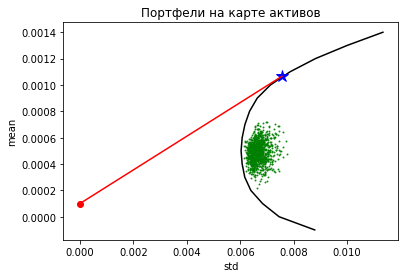

In [508]:
n_portfolios = 1000
means, stds = np.column_stack([  
    fs.random_portfolio(portfolio_R) for _ in range(n_portfolios)
])
plt.plot(stds, means, 'o', markersize=1, alpha=0.8, color='g') 


plt.plot(  efficient_portfolios_sol.T[0], efficient_portfolios_sol.T[1], linestyle='-', color='black', label='efficient frontier')
plt.plot(std_sharp, r_sharp, 'b*',markersize=12) 
plt.scatter(0,risk_free_rate, c='r')
plt.plot( [0,std_sharp], [risk_free_rate, r_sharp],linestyle='-', color='r',)
plt.xlabel('std')  
plt.ylabel('mean')  
plt.title('Портфели на карте активов')  
plt.show()